# Google Play Store Anlysis

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline


In [14]:
df=pd.read_csv('F:\Data Science\python\Assignment\playstore_analysis.csv')

In [15]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# 1. Data clean up – Missing value treatment
a. Drop records where rating is missing since rating is our target/study variable

In [16]:
df.dropna(how='any', subset=['Rating'], axis=0, inplace = True)

In [17]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.00000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.00000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.00000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.00000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.00000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.00000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.00000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.00000,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.52952,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


b. Check the null values for the Android per column. 

In [18]:
result=df.loc[df['Android Ver'].isnull()]

In [19]:
result

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.00000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.00000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.52952,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


b.Drop the 3rd record i.e. record for “Life Made WIFI …”

In [20]:
result.drop([10472],inplace=True)

C:\Users\Ashish Kushwaha\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [21]:
result

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


iii. Replace remaining missing values with the mode

In [22]:
df['Android Ver'].fillna(df['Android Ver'].mode()[0], inplace=True)


In [23]:
df.loc[4453]

App               [substratum] Vacuum: P
Category                 PERSONALIZATION
Rating                               4.4
Reviews                              230
Size                               11000
Installs                          1,000+
Type                                Paid
Price                              $1.49
Content Rating                  Everyone
Genres                   Personalization
Last Updated               July 20, 2018
Current Ver                          4.4
Android Ver                   4.1 and up
Name: 4453, dtype: object

c. Current ver – replace with most common value

In [24]:
df['Current Ver'].fillna(df['Current Ver']. mode()[0],inplace=True)

# 2. Data clean up – correcting the data types

a. Which all variables need to be brought to numeric types?

In [25]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [26]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

b. Price variable – remove $ sign and convert to float

In [27]:
price = []
for i in df['Price']:
    if i[0]=='$':
        price.append(i[1:])
    else:
        price.append(i)

In [28]:
df.drop(labels=df[df['Price']=='Everyone'].index, inplace = True)
df['Price']= price
df['Price']= df['Price'].astype('float')

ValueError: Length of values does not match length of index

In [29]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [30]:
install = []
for j in df['Installs']:
    install.append(j.replace(',','').replace('+','').strip(str))

df['Installs']= install
df['Installs']= df['Installs'].astype('int')

TypeError: strip arg must be None or str

In [31]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.00000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.00000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.00000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.00000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.00000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.00000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.00000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.00000,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.52952,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


d. Convert all other identified columns to numeric

In [32]:
df['Reviews']= df['Reviews'].astype('int')

In [33]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

## 3. Sanity checks – check for the following and handle accordingly.

   a. Avg. rating should be between 1 and 5, as only these values are allowed on the play
store.

In [34]:
df.loc[df.Rating<1] & df.loc[df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


b. Reviews should not be more than installs as only those who installed can review the
app.
i. Are there any such records? Drop if so

In [35]:
df.loc[df.Installs>df.Reviews] 

TypeError: '>' not supported between instances of 'str' and 'int'

## 4. Identify and handle outliers –

    a. Price column
        i. Make suitable plot to identify outliers in price

TypeError: unsupported operand type(s) for /: 'str' and 'int'

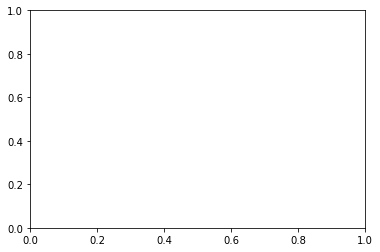

In [36]:
plt.boxplot(df['Price'])
plt.show()

ii. Do you expect apps on the play store to cost $200? Check out these cases

In [ ]:
print('Yes ,There are apps on the play store to cost $200')
df.loc[df['Price'] > 200]


iii. After dropping the useless records, make the suitable plot again to identify
outliers

In [ ]:
plt.boxplot(df['Price'])
plt.show()

iv. Limit data to records with price < $30

In [182]:
df.loc[df['Price']<30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,None,Free,True,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,None,Free,True,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,None,Free,True,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,None,Free,True,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,None,Free,True,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,None,Free,True,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,None,Free,True,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,None,Free,True,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,None,Free,True,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## b. Reviews column

i. Make suitable plot

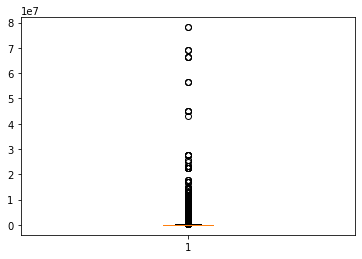

In [184]:
plt.boxplot(df['Reviews'])
plt.show()

ii. Limit data to apps with < 1 Million reviews

In [187]:
ld = df[df['Reviews'] > 1000000 ].index
df.drop(labels = ld, inplace=True)
print(ld.value_counts().sum(),'cols dropped')


0 cols dropped


## c. Installs

i. What is the 95th percentile of the installs?

In [198]:
df['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10834           500+
10836         5,000+
10837           100+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 9367, dtype: object

In [ ]:
percentile = df.Installs.quantile(0.95)
print(percentile,"is 95th percentile of Installs")

ii. Drop records having a value more than the 95th percentile

# Data analysis to answer business questions

### 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?


a. How do you explain this?

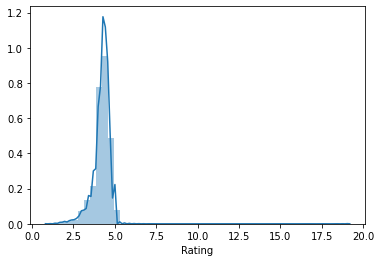

In [229]:
sns.distplot(df['Rating'])
plt.show()

b. What is the implication of this on your analysis?

In [233]:
df['Rating'].mode()

0    4.4
dtype: float64

### 6. What are the top Content Rating values?

a. Are there any values with very few records?

In [235]:
df['Content Rating'].value_counts()

Everyone           7420
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

b. If yes, drop those as they won’t help in the analysis


In [ ]:
cr = []
for k in df['Content Rating']:
    df.append(k.replace('Adults only 18+','NaN').replace('Unrated','NaN'))

df['Content Rating']=cr

In [ ]:
temp2 = df[df["Content Rating"] == 'NaN'].index
df.drop(labels=temp2, inplace=True)
print('droped cols',temp2)

# 7. Effect of size on rating

a. Make a joinplot to understand the effect of size on rating

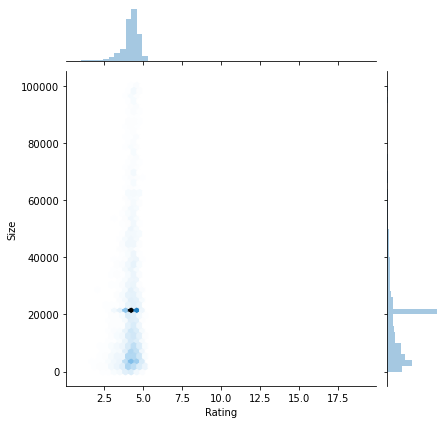

In [244]:
sns.jointplot(y ='Size', x ='Rating', data = df, kind ='hex')
plt.show()


b. Do you see any patterns?

Yes, patterns can be observed between Size and Rating ie. their is correlation between Size and Rating.

c. How do you explain the pattern?
    on increasing Rating, Size of App also increases. 

# 8. Effect of price on rating

a. Make a jointplot (with regression line)

C:\Users\Ashish Kushwaha\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


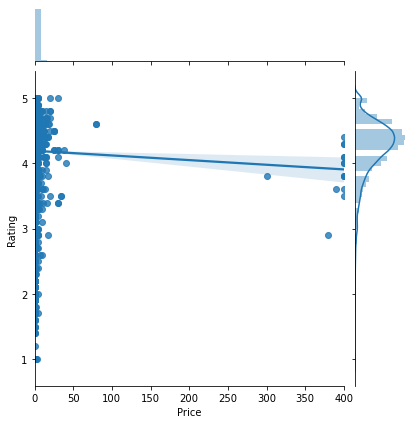

In [248]:
sns.jointplot(x='Price', y='Rating', data=df, kind='reg')
plt.show()

b. What pattern do you see?

Generally on increasing the Price, Rating remains almost constant greater than 4.

c. How do you explain the pattern?

Since on increasing the Price, Rating remains almost constant greater than 4. Thus it can be concluded that their is very weak Positive correlation between Rating and Price.



d. Replot the data, this time with only records with price > 0 

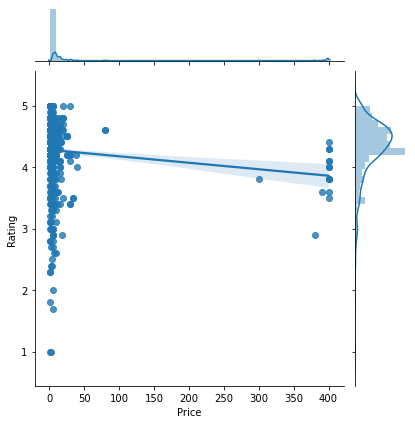

In [250]:
df1=df.loc[df.Price>0]
sns.jointplot(x='Price', y='Rating', data=df1, kind='reg')
plt.show()

e. Does the pattern change?

Yes, On limiting the record with Price > 0, the overall pattern changed a slight ie their is very weakly Negative Correlation between Price and Rating.

In [252]:
df1.corr()

,Rating,Size,Price
Rating,1.000000,0.115400,-0.112951
Size,0.115400,1.000000,-0.077425
Price,-0.112951,-0.077425,1.000000


f. What is your overall inference on the effect of price on the rating

Generally increasing the Prices, doesn't have signifcant effect on Higher Rating. For Higher Price, Rating is High and almost constant ie greater than 4

# 9. Look at all the numeric interactions together –
a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

In [ ]:
sns.pairplot(df, vars=['Reviews', 'Size', 'Rating', 'Price'], kind='reg')
plt.show()

# 10. Rating vs. content rating

a. Make a bar plot displaying the rating for each content rating

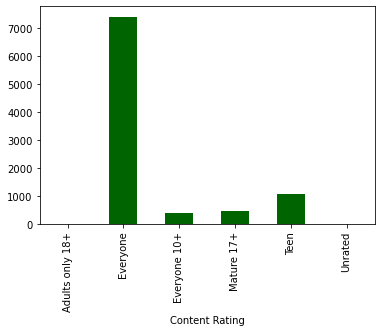

In [38]:
df.groupby(['Content Rating'])['Rating'].count().plot.bar(color="darkgreen")


In [39]:
plt.show()

b. Which metric would you use? Mean? Median? Some other quantile?

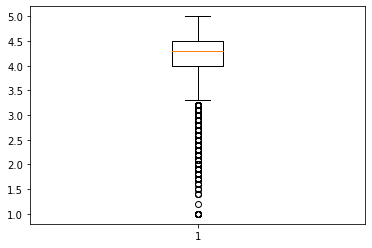

In [37]:
plt.boxplot(df['Rating'])
plt.show()

We must use Median in this case as we are having Outliers in Rating. Because in case of Outliers , median is the best measure of central tendency.

c. Choose the right metric and plot

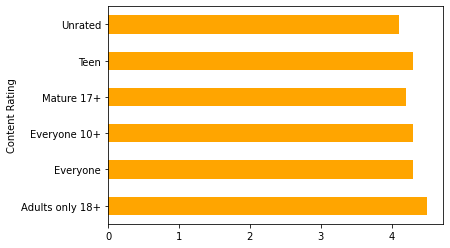

In [42]:
df.groupby(['Content Rating'])['Rating'].median().plot.barh(color="orange")
plt.show()


## 11. Content rating vs. size vs. rating – 3 variables at a time
a. Create 5 buckets (20% records in each) based on Size

In [45]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
df['Bucket Size'] = pd.cut(df['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Bucket Size,,,,,,
0-20k,4.6,4.149574,4.247561,4.015183,4.189147,4.1
20k-40k,3.8,4.229393,4.197802,4.195109,4.237590,NaN
40k-60k,4.5,4.192505,4.265957,4.202222,4.270896,NaN
60k-80k,NaN,4.271774,4.374000,4.190909,4.291045,NaN
80k-100k,NaN,4.280000,4.405556,4.252632,4.314815,NaN


b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [46]:
ab=pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
ab

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Bucket Size,,,,,,
0-20k,4.6,3.8,4.02,3.5,3.9,4.1
20k-40k,3.8,4.0,4.00,4.0,4.0,NaN
40k-60k,4.5,3.9,4.10,4.1,4.0,NaN
60k-80k,NaN,4.0,4.20,4.0,4.0,NaN
80k-100k,NaN,4.1,4.30,4.0,4.1,NaN


c. Make a heatmap of this
    i. Annotated
    ii. Greens color map

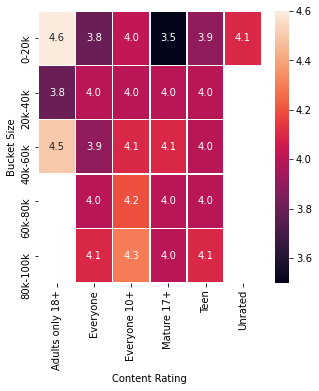

In [49]:
#i.
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(ab, annot=True, linewidths=.5, fmt='.1f',ax=ax)
plt.show()

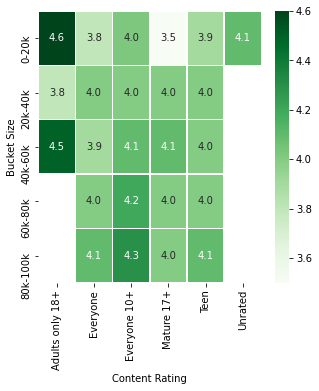

In [56]:
#ii
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(ab, annot=True, linewidths=.5, cmap='Greens',fmt='.1f',ax=ax)
plt.show()

d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

Based on analysis, its not true that lighter apps are preferred in all categories. Because apps with size 40k-60k and 80k-100k have got the highest rating in all cateegories. So, in general we can conclude that heavier apps are preferred in all categories